####  HW4

__Daniela Paz Díaz Mora__

#### __Problema 4 [25 puntos].__ Consideremos nuevamente el conjunto de datos diag2010.txt (usado en una tarea anterior). Las variables de interés son:

-X1 = Puntaje en la PSU parte matemática

-X2 = Notas de Enseñanza Media

-X3 = Puntaje en la Prueba de Diagnóstico USM

#### __a)__ Use análisis discriminante para separar las poblaciones en tres poblaciones. Recuerde que la separación hecha por la USM fue en base al puntaje en la prueba de diagn´ostico solamente (Puntaje > 820, Puntaje entre 620 y 820, Puntaje< 620).

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
data=pd.read_csv('diag2010.txt', sep = "\t")
data.columns=['PSU', 'LC', 'Mate', 'NEM','OC','OH', 'Buenas', 'Malas', 'Omitidas',
       'Nota', 'Calculo', 'R1', 'R2', 'R3', 'R4']
X=data[['Mate','Calculo','NEM']]
X=X.dropna()
def poblacion(x):
    if x>820:
        return 1
    elif x>=620:
        return 2
    else: 
        return 3
y=X[['Calculo']]
y['Pob']=y['Calculo'].apply(poblacion)
y=y.drop(['Calculo'],axis=1)
X

/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mate,Calculo,NEM
0,678.0,731,620.0
1,756.0,762,496.0
2,718.0,712,682.0
3,682.0,683,723.0
4,682.0,769,723.0
...,...,...,...
2176,774.0,740,599.0
2177,701.0,674,702.0
2178,648.0,660,682.0
2179,706.0,631,599.0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model= LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

#### __b)__ Muestre un diagrama de dispersion para las dos primeras funciones discriminantes para observar visualmente si existe separacion entre los grupos de variables.

In [61]:
test = pd.DataFrame(data = X_test, columns = ['Mate', 'Calculo', 'NEM'] )
test['pob_pred']=model.predict(X_test)
test

,Mate,Calculo,NEM,pob_pred
1877,701.0,759,579.0,2
410,706.0,719,620.0,2
785,718.0,788,579.0,2
714,812.0,816,599.0,2
1744,640.0,655,579.0,2
...,...,...,...,...
218,774.0,660,558.0,2
2153,678.0,612,702.0,3
2146,637.0,586,682.0,3
352,688.0,674,620.0,2


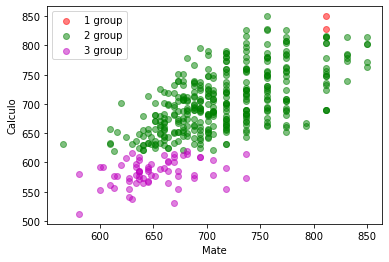

In [88]:
group=df.groupby(test.pob_pred)
df1=group.get_group(1)
df2=group.get_group(2)
df3=group.get_group(3)

plt.scatter(df1['Mate'],df1['Calculo'],label='1 group',c='r',alpha=0.5)
plt.scatter(df2['Mate'],df2['Calculo'],label='2 group',c='g',alpha=0.5)
plt.scatter(df3['Mate'],df3['Calculo'],label='3 group',c='m',alpha=0.5)
plt.legend()
plt.xlabel('Mate')
plt.ylabel('Calculo')
plt.show()

#### __c)__ Un estudiante que ingreso por ingresos especiales tiene los siguientes puntajes $$X=(615,5.3,600)$$ ¿En qué categoría lo ubicaría usted?

In [91]:
model.predict([[615,600,470.3]])

array([3])

Se tiene que 5.3 equivale a 470.3 puntos NEM, nuestro modelo nos dice que lo pongamos en las categoria 3 Puntaje<620